# Neptune - Voyager 2 - comment ne pas se noyer dans les donnees 
Le probleme est assez simple: je voudrais refaire le traitement de donnees de certaines images de Voyager 2 (Neptune). Comment faire ? Voici par exemple un exemple de donnees (un preview dans ce cas-ci) d'image (presque) brute que l'on peut recuperer sur le site de la NASA. Tres belle image, mais un seul canal de couleurs, et je ne suis pas tres interesse a garder les points noirs ...

<center>
<figure>
    <img src="https://pds-rings.seti.org/holdings/previews/VGISS_8xxx/VGISS_8206/DATA/C11107XX/C1110702_full.jpg" alt="Neptune"
	title="Neptune, Voyager2" width="300" height="200" />
    <figcaption> Neptune, Voyager2, raw data preview</figcaption>
</figure>
    <center>

screenshots of the online repo for all the volumes related to the Neptune encounter: https://pds-rings.seti.org/viewmaster/volumes/VGISS_8xxx

La premiere etape est d'installer et de charger les librairies que l'on souhaite utiliser. Dans notre cas, les librairies pandas : Python Data Analysis Library, disponible ici : https://pandas.pydata.org

In [278]:
!pip install pandas

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
import pandas as pd

Nous allons maintenant installer/importer les librairies qui vont nous permettre de telecharger les fichiers localement (wget), les commandes de l'OS (os) pour pouvoir executer les commandes du logiciel ISIS3 (Integrated Software for Imagers and Spectrometers : https://isis.astrogeology.usgs.gov/index.html), et la librairie shutils qui nous permettra de deplacer les fichiers telecharges localement.

In [96]:
!pip install wget
import wget,os,shutil

You are using pip version 9.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


La fonction panda pour lire un fichier CSV, c'est a dire ou les colonnes de donnees sont separees par des virgules est pd.read_csv(), dont la documentation est disponible ici : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
Essayons donc d'ingerer notre fichier CSV et affichons les 3 premieres lignes


In [212]:
df=pd.read_csv('https://pds-rings.seti.org/holdings/metadata/VGISS_8xxx/VGISS_8209/VGISS_8209_index.tab')
df.head(3)

,VGISS_8209,DATA/C11600XX/C1160006_CALIB.LBL,C1160006_CALIB.IMG,CALIBRATED_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.0800,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTATION,11111111,NONE
0,VGISS_8209,DATA/C11600XX/C1160006_CLEANED.LBL,C1160006_CLEANED.IMG,CLEANED_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.08,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
1,VGISS_8209,DATA/C11600XX/C1160006_GEOMA.LBL,C1160006_GEOMA.DAT,TIEPOINT_TABLE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.08,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
2,VGISS_8209,DATA/C11600XX/C1160006_GEOMED.LBL,C1160006_GEOMED.IMG,GEOMETRICALLY_CORRECTED_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.08,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE


Oupssss ... qu'est ce qu'il se passe ? Nous n'avons pas dit a la fonction "comment" lire les donnees et par defaut, la premiere ligne contient les "headers" (en-tetes), ou autrement dit, les noms des differentes colonnes. Un peu comme dans un fichier excel ou equivalent: c'est toujours pratique de pouvoir dire "affiche moi les heures de prise de vue de Neptune avec le filtre violet". C'est exactement ce que nous allons faire. L'information est contenue dans le fichier lbl associe au fichier de data (meme nom, extension lbl au lien de tab). Nous allons faire quelques manipulations en ligne de commande linux afin de recuperer la liste des noms de colonnes:

In [215]:
url='https://pds-rings.seti.org/holdings/metadata/VGISS_8xxx/VGISS_8209/VGISS_8209_index.lbl'
file='./VGISS_8209_index.tab'
output=file
wget.download(url, out=file)
# Overwrite file if already exists
if os.path.exists(output):
    shutil.move(file,output)
liste=!cat VGISS_8209_index.tab | grep NAME | awk '{print $3}'
print(liste)
len(liste)

['VOLUME_NAME', 'FILE_SPECIFICATION_NAME', 'PRODUCT_ID', 'PRODUCT_TYPE', 'INSTRUMENT_HOST_NAME', 'MISSION_PHASE_NAME', 'TARGET_NAME', 'IMAGE_ID', 'IMAGE_NUMBER', 'IMAGE_TIME', 'EARTH_RECEIVED_TIME', 'INSTRUMENT_NAME', 'SCAN_MODE', 'SHUTTER_MODE', 'GAIN_MODE', 'EDIT_MODE', 'FILTER_NAME', 'FILTER_NUMBER', 'EXPOSURE_DURATION', 'NOTE', 'SAMPLE_BIT_MASK', 'DATA_ANOMALY']


22

Ou alors on peut construire notre liste "a la main":

In [166]:
new_names=['VOLUME_NAME','FILE_SPECIFICATION_NAME','PRODUCT_ID','PRODUCT_TYPE','INSTRUMENT_HOST_NAME','MISSION_PHASE_NAME','TARGET_NAME','IMAGE_ID','IMAGE_NUMBER','IMAGE_TIME','EARTH_RECEIVED_TIME','INSTRUMENT_NAME','SCAN_MODE','SHUTTER_MODE','GAIN_MODE','EDIT_MODE','FILTER_NAME','FILTER_NUMBER','EXPOSURE_DURATION','NOTE','SAMPLE_BIT_MASK','DATA_ANOMALY']
len(new_names)

22

Nous pouvons maintenant ingerer les donnees en ligne et en les important, associer nos noms aux labels de colonnes:

In [216]:

df=pd.read_csv('https://pds-rings.seti.org/holdings/metadata/VGISS_8xxx/VGISS_8209/VGISS_8209_index.tab', names=new_names)
df.head()

,VOLUME_NAME,FILE_SPECIFICATION_NAME,PRODUCT_ID,PRODUCT_TYPE,INSTRUMENT_HOST_NAME,MISSION_PHASE_NAME,TARGET_NAME,IMAGE_ID,IMAGE_NUMBER,IMAGE_TIME,...,SCAN_MODE,SHUTTER_MODE,GAIN_MODE,EDIT_MODE,FILTER_NAME,FILTER_NUMBER,EXPOSURE_DURATION,NOTE,SAMPLE_BIT_MASK,DATA_ANOMALY
0,VGISS_8209,DATA/C11600XX/C1160006_CALIB.LBL,C1160006_CALIB.IMG,CALIBRATED_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.08,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
1,VGISS_8209,DATA/C11600XX/C1160006_CLEANED.LBL,C1160006_CLEANED.IMG,CLEANED_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.08,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
2,VGISS_8209,DATA/C11600XX/C1160006_GEOMA.LBL,C1160006_GEOMA.DAT,TIEPOINT_TABLE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.08,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
3,VGISS_8209,DATA/C11600XX/C1160006_GEOMED.LBL,C1160006_GEOMED.IMG,GEOMETRICALLY_CORRECTED_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.08,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
4,VGISS_8209,DATA/C11600XX/C1160006_RAW.LBL,C1160006_RAW.IMG,DECOMPRESSED_RAW_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.08,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE


Dimensions de notre dataframe: (nombre de lignes, nombre de colonnes)

In [217]:
df.shape

(5532, 22)

Selon la documentation, nous voulons regarder les images qui ont eu le plus de corrections:
We want to look at cleaned, calib and geomed data: CLEANED - The raw image with various spikes, blemishes and reseau markings removed. CALIB - The calibrated image, in which data numbers are directly proportional to reflectivity. GEOMED - The geometrically corrected version of the calibrated image. 
PRODUCT_TYPE == CLEANED_IMAGE OR PRODUCT_TYPE == CALIBRATED_IMAGE OR PRODUCT_TYPE == GEOMETRICALLY_CORRECTED_IMAGE

Maintenant, cela devient interessant, car nous pouvons "questionner" notre dataframe et par exemple, demander la liste des noms des fichiers lbl (fichiers que nous devons passer en argument au logiciel ISIS3 pour produire des images) dont la target est Neptune, qui ont ete prises avec le filtre violet, et qui sont geometriquement corrigees:

In [218]:
liste_violet=df.loc[(df['TARGET_NAME'] =='NEPTUNE   ')  & (df['FILTER_NAME'] == 'VIOLET') & (df['PRODUCT_TYPE'] == 'GEOMETRICALLY_CORRECTED_IMAGE')]['FILE_SPECIFICATION_NAME']
liste_violet

651     DATA/C11618XX/C1161808_GEOMED.LBL 
693     DATA/C11618XX/C1161854_GEOMED.LBL 
735     DATA/C11619XX/C1161938_GEOMED.LBL 
777     DATA/C11620XX/C1162038_GEOMED.LBL 
819     DATA/C11622XX/C1162201_GEOMED.LBL 
867     DATA/C11623XX/C1162348_GEOMED.LBL 
909     DATA/C11624XX/C1162434_GEOMED.LBL 
951     DATA/C11625XX/C1162518_GEOMED.LBL 
993     DATA/C11626XX/C1162604_GEOMED.LBL 
1035    DATA/C11626XX/C1162648_GEOMED.LBL 
1077    DATA/C11627XX/C1162734_GEOMED.LBL 
1119    DATA/C11628XX/C1162818_GEOMED.LBL 
1161    DATA/C11629XX/C1162904_GEOMED.LBL 
1203    DATA/C11629XX/C1162948_GEOMED.LBL 
1245    DATA/C11630XX/C1163034_GEOMED.LBL 
1287    DATA/C11631XX/C1163118_GEOMED.LBL 
1329    DATA/C11632XX/C1163204_GEOMED.LBL 
1371    DATA/C11632XX/C1163248_GEOMED.LBL 
1413    DATA/C11633XX/C1163334_GEOMED.LBL 
1455    DATA/C11634XX/C1163418_GEOMED.LBL 
1497    DATA/C11635XX/C1163504_GEOMED.LBL 
1539    DATA/C11635XX/C1163548_GEOMED.LBL 
1593    DATA/C11637XX/C1163737_GEOMED.LBL 
1635    DAT

On peut aussi afficher toutes les donnees pour lesquelles la target est Neptune:

In [219]:
df[df['TARGET_NAME']=='NEPTUNE   ']

,VOLUME_NAME,FILE_SPECIFICATION_NAME,PRODUCT_ID,PRODUCT_TYPE,INSTRUMENT_HOST_NAME,MISSION_PHASE_NAME,TARGET_NAME,IMAGE_ID,IMAGE_NUMBER,IMAGE_TIME,...,SCAN_MODE,SHUTTER_MODE,GAIN_MODE,EDIT_MODE,FILTER_NAME,FILTER_NUMBER,EXPOSURE_DURATION,NOTE,SAMPLE_BIT_MASK,DATA_ANOMALY
0,VGISS_8209,DATA/C11600XX/C1160006_CALIB.LBL,C1160006_CALIB.IMG,CALIBRATED_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.080,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
1,VGISS_8209,DATA/C11600XX/C1160006_CLEANED.LBL,C1160006_CLEANED.IMG,CLEANED_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.080,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
2,VGISS_8209,DATA/C11600XX/C1160006_GEOMA.LBL,C1160006_GEOMA.DAT,TIEPOINT_TABLE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.080,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
3,VGISS_8209,DATA/C11600XX/C1160006_GEOMED.LBL,C1160006_GEOMED.IMG,GEOMETRICALLY_CORRECTED_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.080,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
4,VGISS_8209,DATA/C11600XX/C1160006_RAW.LBL,C1160006_RAW.IMG,DECOMPRESSED_RAW_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.080,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
5,VGISS_8209,DATA/C11600XX/C1160006_RESLOC.LBL,C1160006_RESLOC.DAT,RESEAU_TABLE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1782N2+006,11600.06,1989-09-01T03:47:08,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.080,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
6,VGISS_8209,DATA/C11600XX/C1160013_CALIB.LBL,C1160013_CALIB.IMG,CALIBRATED_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1789N2+006,11600.13,1989-09-01T03:52:44,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.080,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
7,VGISS_8209,DATA/C11600XX/C1160013_CLEANED.LBL,C1160013_CLEANED.IMG,CLEANED_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1789N2+006,11600.13,1989-09-01T03:52:44,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.080,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
8,VGISS_8209,DATA/C11600XX/C1160013_GEOMA.LBL,C1160013_GEOMA.DAT,TIEPOINT_TABLE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1789N2+006,11600.13,1989-09-01T03:52:44,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.080,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE
9,VGISS_8209,DATA/C11600XX/C1160013_GEOMED.LBL,C1160013_GEOMED.IMG,GEOMETRICALLY_CORRECTED_IMAGE,VOYAGER 2,NEPTUNE ENCOUNTER,NEPTUNE,1789N2+006,11600.13,1989-09-01T03:52:44,...,5:1,NAONLY,LOW,1:1,CLEAR,0,46.080,CLEAR IMAGES FOR LIGHTNING DETECTION; ONE ROTA...,11111111,NONE


Bon, maintenant, contrairement a certains fichiers lbl pour d'autres missions (new horizons par exemple), nous n'avons pas acces a la distance par rapport a la cible ... seulement acces a la date de prise de vue (IMAGE_TIME). Regardons la quantite de donnees pour des dates uniques (toujours avec Neptune comme cible)

In [220]:
dates=df[df['TARGET_NAME']=='NEPTUNE   ']['IMAGE_TIME'].unique()
dates.shape

(865,)

Pas beaucoup ... quelle est donc la quantite de donnees ayant Neptune pour cible, sans aucune contrainte quand a la date de prise de vue:

In [221]:
len(df['TARGET_NAME']=='NEPTUNE   ')


5532

Meme nombre de lignes que la dataframe au complet - ce n'est pas une surprise car nous accedons a un volume de donnees en ligne qui fait partie de la phase "Neptune encounter" de la mission voyager2 :-)

In [222]:
df.shape

(5532, 22)

Combiens avons-nous en moyenne d'images par prise de vue unique ? (i.e. nombre d'images pour une date particuliere)

In [223]:
round(5532/865)

6

Explorons ... qu'est ce que cela veut dire exactement ... 

In [228]:
print(dates)

['1989-09-01T03:47:08' '1989-09-01T03:52:44' '1989-09-01T03:58:20'
 '1989-09-01T04:03:56' '1989-09-01T04:09:32' '1989-09-01T04:15:08'
 '1989-09-01T04:20:44' '1989-09-01T04:26:20' '1989-09-01T04:31:56'
 '1989-09-01T04:37:32' '1989-09-01T04:43:08' '1989-09-01T04:48:44'
 '1989-09-01T04:54:20' '1989-09-01T04:59:56' '1989-09-01T05:05:32'
 '1989-09-01T05:11:08' '1989-09-01T05:16:44' '1989-09-01T05:22:20'
 '1989-09-01T05:27:56' '1989-09-01T05:33:32' '1989-09-01T05:39:08'
 '1989-09-01T05:44:44' '1989-09-01T05:50:20' '1989-09-01T05:55:56'
 '1989-09-01T06:01:32' '1989-09-01T06:07:08' '1989-09-01T06:12:44'
 '1989-09-01T06:18:20' '1989-09-01T06:23:56' '1989-09-01T06:29:32'
 '1989-09-01T06:35:08' '1989-09-01T06:40:44' '1989-09-01T06:46:20'
 '1989-09-01T06:51:56' '1989-09-01T06:57:32' '1989-09-01T07:03:08'
 '1989-09-01T07:08:44' '1989-09-01T07:14:20' '1989-09-01T07:19:56'
 '1989-09-01T07:25:32' '1989-09-01T07:31:08' '1989-09-01T07:36:44'
 '1989-09-01T07:42:20' '1989-09-01T07:47:56' '1989-09-01T07:53

In [224]:
print(dates[0])
df[df['IMAGE_TIME']==dates[0]]['FILTER_NAME']

1989-09-01T03:47:08


0    CLEAR 
1    CLEAR 
2    CLEAR 
3    CLEAR 
4    CLEAR 
5    CLEAR 
Name: FILTER_NAME, dtype: object

In [231]:
print(dates[149])
df[df['IMAGE_TIME']==dates[149]]['FILTER_NAME']

1989-09-02T00:06:20


960    GREEN 
961    GREEN 
962    GREEN 
963    GREEN 
964    GREEN 
965    GREEN 
Name: FILTER_NAME, dtype: object

In [227]:
for i in range(0,150):
    print(dates[i])
    print(df[df['IMAGE_TIME']==dates[i]]['FILTER_NAME'])
    print(df[df['IMAGE_TIME']==dates[i]]['INSTRUMENT_NAME'])

1989-09-01T03:47:08
0    CLEAR 
1    CLEAR 
2    CLEAR 
3    CLEAR 
4    CLEAR 
5    CLEAR 
Name: FILTER_NAME, dtype: object
0    NARROW ANGLE CAMERA
1    NARROW ANGLE CAMERA
2    NARROW ANGLE CAMERA
3    NARROW ANGLE CAMERA
4    NARROW ANGLE CAMERA
5    NARROW ANGLE CAMERA
Name: INSTRUMENT_NAME, dtype: object
1989-09-01T03:52:44
6     CLEAR 
7     CLEAR 
8     CLEAR 
9     CLEAR 
10    CLEAR 
11    CLEAR 
Name: FILTER_NAME, dtype: object
6     NARROW ANGLE CAMERA
7     NARROW ANGLE CAMERA
8     NARROW ANGLE CAMERA
9     NARROW ANGLE CAMERA
10    NARROW ANGLE CAMERA
11    NARROW ANGLE CAMERA
Name: INSTRUMENT_NAME, dtype: object
1989-09-01T03:58:20
12    CLEAR 
13    CLEAR 
14    CLEAR 
15    CLEAR 
16    CLEAR 
17    CLEAR 
Name: FILTER_NAME, dtype: object
12    NARROW ANGLE CAMERA
13    NARROW ANGLE CAMERA
14    NARROW ANGLE CAMERA
15    NARROW ANGLE CAMERA
16    NARROW ANGLE CAMERA
17    NARROW ANGLE CAMERA
Name: INSTRUMENT_NAME, dtype: object
1989-09-01T04:03:56
18    CLEAR 
19    C

Name: FILTER_NAME, dtype: object
348    NARROW ANGLE CAMERA
349    NARROW ANGLE CAMERA
350    NARROW ANGLE CAMERA
351    NARROW ANGLE CAMERA
352    NARROW ANGLE CAMERA
353    NARROW ANGLE CAMERA
Name: INSTRUMENT_NAME, dtype: object
1989-09-01T09:17:32
354    CLEAR 
355    CLEAR 
356    CLEAR 
357    CLEAR 
358    CLEAR 
359    CLEAR 
Name: FILTER_NAME, dtype: object
354    NARROW ANGLE CAMERA
355    NARROW ANGLE CAMERA
356    NARROW ANGLE CAMERA
357    NARROW ANGLE CAMERA
358    NARROW ANGLE CAMERA
359    NARROW ANGLE CAMERA
Name: INSTRUMENT_NAME, dtype: object
1989-09-01T09:23:08
360    CLEAR 
361    CLEAR 
362    CLEAR 
363    CLEAR 
364    CLEAR 
365    CLEAR 
Name: FILTER_NAME, dtype: object
360    NARROW ANGLE CAMERA
361    NARROW ANGLE CAMERA
362    NARROW ANGLE CAMERA
363    NARROW ANGLE CAMERA
364    NARROW ANGLE CAMERA
365    NARROW ANGLE CAMERA
Name: INSTRUMENT_NAME, dtype: object
1989-09-01T09:28:44
366    CLEAR 
367    CLEAR 
368    CLEAR 
369    CLEAR 
370    CLEAR 
371   

876    NARROW ANGLE CAMERA
877    NARROW ANGLE CAMERA
878    NARROW ANGLE CAMERA
879    NARROW ANGLE CAMERA
880    NARROW ANGLE CAMERA
881    NARROW ANGLE CAMERA
Name: INSTRUMENT_NAME, dtype: object
1989-09-01T22:59:56
882    ORANGE
883    ORANGE
884    ORANGE
885    ORANGE
886    ORANGE
887    ORANGE
Name: FILTER_NAME, dtype: object
882    NARROW ANGLE CAMERA
883    NARROW ANGLE CAMERA
884    NARROW ANGLE CAMERA
885    NARROW ANGLE CAMERA
886    NARROW ANGLE CAMERA
887    NARROW ANGLE CAMERA
Name: INSTRUMENT_NAME, dtype: object
1989-09-01T23:05:32
888    UV    
889    UV    
890    UV    
891    UV    
892    UV    
893    UV    
Name: FILTER_NAME, dtype: object
888    NARROW ANGLE CAMERA
889    NARROW ANGLE CAMERA
890    NARROW ANGLE CAMERA
891    NARROW ANGLE CAMERA
892    NARROW ANGLE CAMERA
893    NARROW ANGLE CAMERA
Name: INSTRUMENT_NAME, dtype: object
1989-09-01T23:11:08
894    CH4_JS
895    CH4_JS
896    CH4_JS
897    CH4_JS
898    CH4_JS
899    CH4_JS
Name: FILTER_NAME, dtype:

Nous notons au passage que: 
- les images sont groupees par 6 pour un meme filtre et qu'ensuite on change de filtre
- les images sont majoritairement prises par la camera Narrow Angle 
- les premieres images de la serie ont ete prises avec le filtre transparent uniquement et ensuite on a un changement de filtre toutes les 6 images

Pour plus d'information sur les filtres, voir la page wikipedia: https://en.wikipedia.org/wiki/Voyager_2#Scientific_instruments

Le but du jeu est maintenant d'assembler les bouts d'information que l'on a sur la localisation du/des fichier(s) que l'on souhaite telecharger et construite l'URL finale. Nous allons ensuite   verifier que nous sommes capables d'effectuer l'automatisation du traitement de donnees (telechargement puis ensuite utilisation de ISIS3)

In [248]:
#on recupere le nom de volume et on l'affiche - c'est le meme pour toutes les dates

volume_name=df[(df['IMAGE_TIME']==dates[0]) & (df['PRODUCT_TYPE']=='GEOMETRICALLY_CORRECTED_IMAGE') & (df['INSTRUMENT_NAME']=='NARROW ANGLE CAMERA')]['VOLUME_NAME']
print('nom du volume: '+volume_name.to_string().strip())

#on recupere le nom de fichier (avec le chemin) pour une date particuliere et on l'affiche
date_index=149
file_name_with_path=df[(df['IMAGE_TIME']==dates[date_index]) & (df['PRODUCT_TYPE']=='GEOMETRICALLY_CORRECTED_IMAGE') & (df['INSTRUMENT_NAME']=='NARROW ANGLE CAMERA')]['FILE_SPECIFICATION_NAME']
print(file_name_with_path)

#le "template" pour notre url i.e. toutes les url vont commencer par le meme template
base_url='https://pds-rings.seti.org/holdings/volumes/VGISS_8xxx'

#on construit l'url finale (noter les astuces : strip() et index=None) et on l'affiche
url=base_url+'/'+volume_name.to_string(index=None).strip()+'/'+file_name_with_path.to_string(index=None).strip()
print('url: '+url)

#on extrait le nom du ficher (i.e. n'incluant pas le chemin) car on va s'en servir plus tard, et on l'affiche
file_name=os.path.basename(file_name_with_path.to_string(index=None).strip())
print('nom du fichier : '+file_name)

output=file_name

#On peut maintenant telecharger le fichier en faisant attention de ne garder qu'un seul fichier, meme en cas
# d'executions multiples (si on ne fait pas attention, on se retrouve avec fichier.lbl, fichier (1).lbl etc ,..)

file=wget.download(url,out=output)
# Overwrite file if already exists
if os.path.exists(output):
    shutil.move(file,output)

#nous devons maintenant faire la meme chose pour le fichier IMG. La on se rappelle que dans le format fits 
#des images astronomiques - comme Hubble par exemple- les donnees sont inclues dans le fichier. 
#Les donnees PDS (Planetary Data System) sont differentes dans les sens ou les informations sur l'image (lbl)
#sont separees des donnees de l'image (img) et nous avons besoin des deux fichier 

file_name_img=os.path.splitext(file_name)[0]+".IMG"
print('nom fichier associe aux donnees image: '+file_name_img)

url_img=os.path.splitext(url)[0]+".IMG"
print('url fichier img: '+url_img)

output=file_name_img
file=wget.download(url_img,out=output)
# Overwrite file if already exists
if os.path.exists(output):
    shutil.move(file,output)
    

nom du volume: 3    VGISS_8209
963    DATA/C11625XX/C1162530_GEOMED.LBL 
Name: FILE_SPECIFICATION_NAME, dtype: object
url: https://pds-rings.seti.org/holdings/volumes/VGISS_8xxx/VGISS_8209/DATA/C11625XX/C1162530_GEOMED.LBL
nom du fichier : C1162530_GEOMED.LBL
nom fichier associe aux donnees image: C1162530_GEOMED.IMG
url fichier img: https://pds-rings.seti.org/holdings/volumes/VGISS_8xxx/VGISS_8209/DATA/C11625XX/C1162530_GEOMED.IMG


On verifie que l'on a bien les fichiers que l'on souhaite:

In [233]:
!ls


C0896631_GEOMED.IMG      C1162530_GEOMED.LBL      Voyager2pandas.ipynb
C0896631_GEOMED.LBL      VGISS_8201_index.tab     print.prt
C0896631_GEOMED.cub      VGISS_8209_index (1).tab
C1162530_GEOMED.IMG      VGISS_8209_index.tab


La commande isis3 que l'on souhaite executer est pds2isis, pour passer des fichiers PDS au format interne d'isis3 (extension .cub). LEs details de la commande (les arguments qu'elle necessite etc ...) sont disponibles ici: https://isis.astrogeology.usgs.gov/Application/presentation/Tabbed/pds2isis/pds2isis.html

On verifie que la commande  que l'on souhaite executer (pds2isis) est bien dans notre 'chemin':

In [234]:
!which pds2isis

/anaconda3/envs/isis3/bin/pds2isis


Nous pouvons donc executer la commande en invoquant son nom, avec les bons parametres, et ce a travers la fonction os.system (apres avoir construit le nom de fichier correspondant et la commande en tant que telle):

In [249]:
file_name_cub=os.path.splitext(file_name)[0]+".cub"
print(file_name_cub)
commande='pds2isis from='+file_name+' to='+file_name_cub
print(commande)
os.system(commande)


C1162530_GEOMED.cub
pds2isis from=C1162530_GEOMED.LBL to=C1162530_GEOMED.cub


0

Nous pouvons finalement transformer les donnees isis3 en ficheir que l'on va pouvoir lire avec par exemple, PixInsight, avec la commande isis2std: https://isis.astrogeology.usgs.gov/Application/presentation/Tabbed/isis2std/isis2std.html

In [250]:
file_name_tiff=os.path.splitext(file_name)[0]+".tif"
commande2='isis2std from='+file_name_cub+' to='+file_name_tiff+' format=tiff'
print(commande2)
os.system(commande2)

isis2std from=C1162530_GEOMED.cub to=C1162530_GEOMED.tif format=tiff


0

In [245]:
ls


C0896631_GEOMED.IMG       C1162530_GEOMED.LBL       VGISS_8209_index (1).tab
C0896631_GEOMED.LBL       C1162530_GEOMED.cub       VGISS_8209_index.tab
C0896631_GEOMED.cub       C1162530_GEOMED.tif       Voyager2pandas.ipynb
C1162530_GEOMED.IMG       VGISS_8201_index.tab      print.prt


Le fichier tif est maintenant disponible, on peut charger quelques libraries pour effectuer une visualisation rapide

In [271]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib notebook

<IPython.core.display.Javascript object>


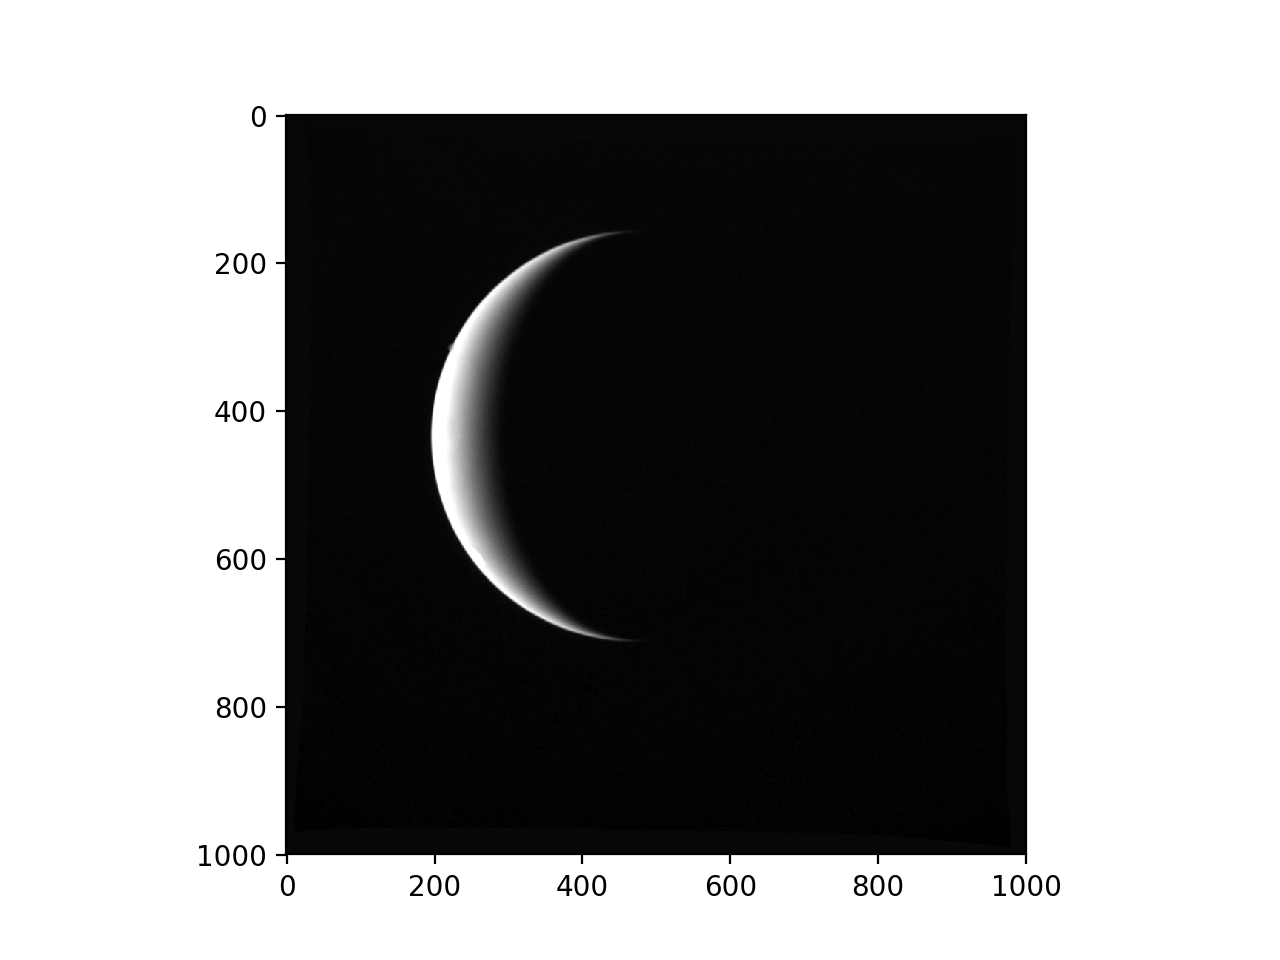

In [272]:
pil_im = Image.open(file_name_tiff, 'r')
imshow(np.asarray(pil_im),cmap='gray')

256


<IPython.core.display.Javascript object>


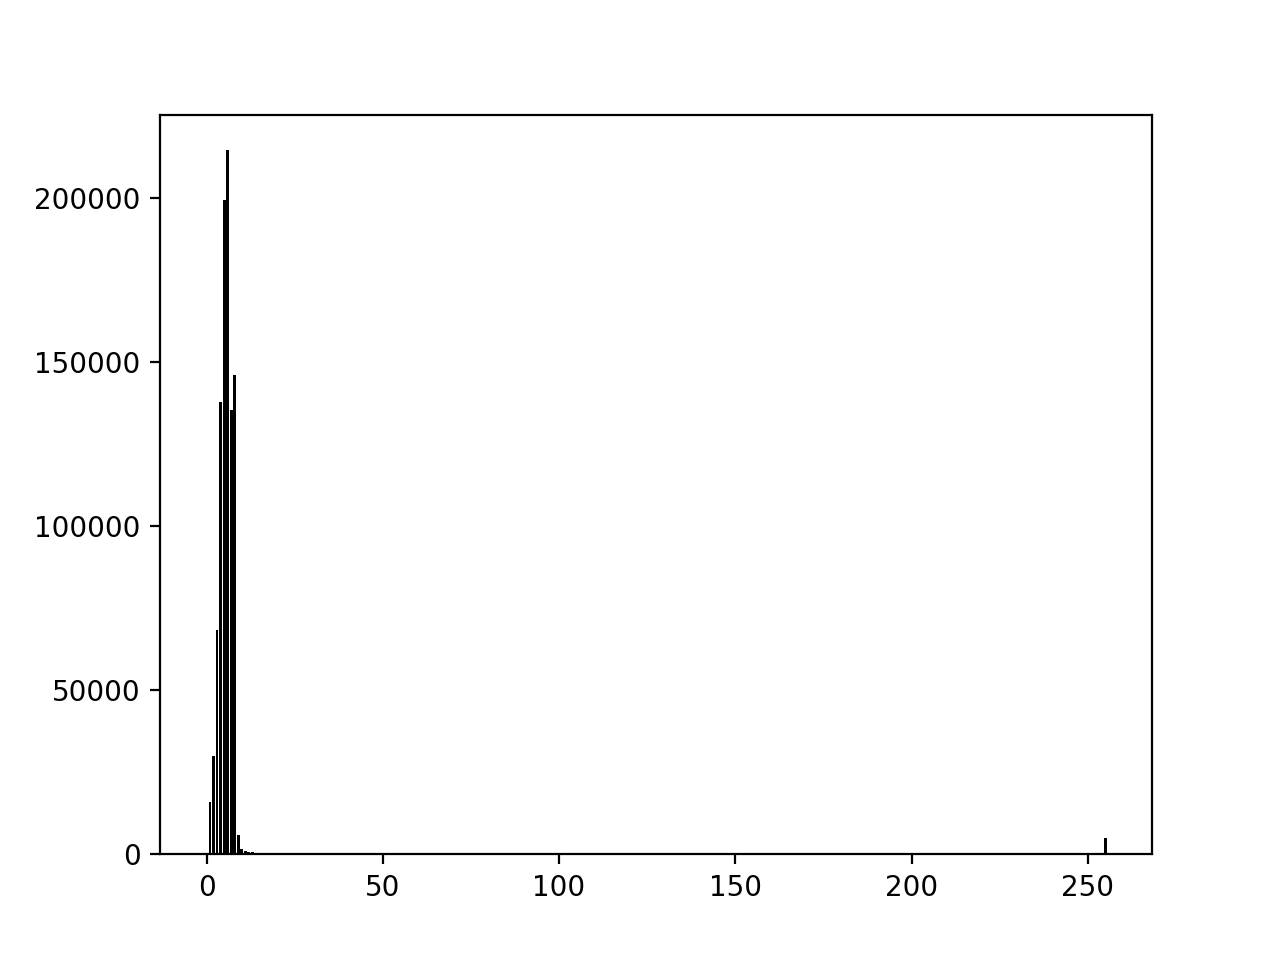

In [273]:
histogram=pil_im.histogram()
print(len(histogram))

for i in range(0, 256):
    plt.bar(i, histogram[i], color='k')
            


<IPython.core.display.Javascript object>


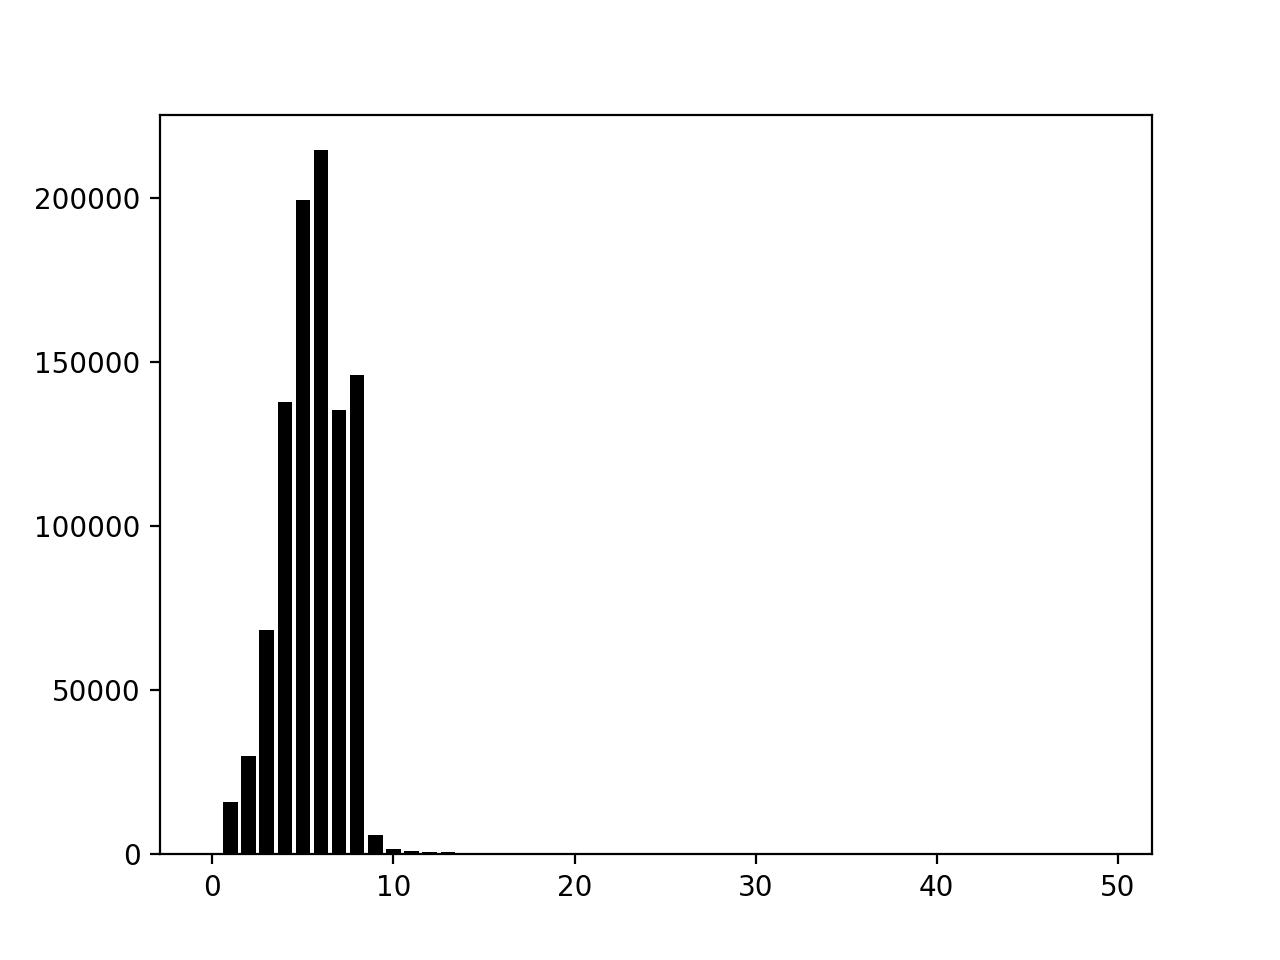

In [274]:
for i in range(0, 50):
    plt.bar(i, histogram[i], color='k')

<IPython.core.display.Javascript object>


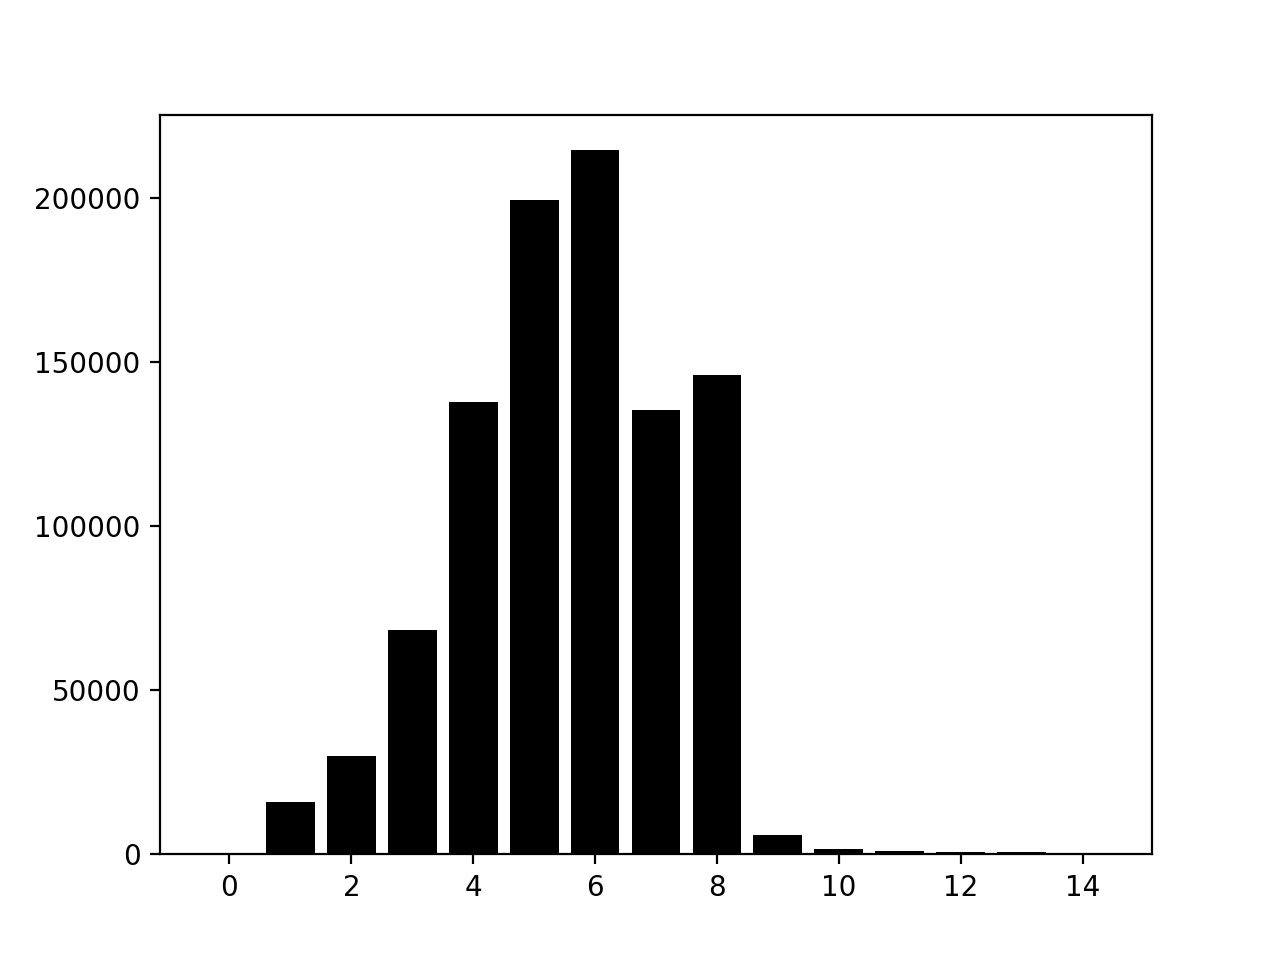

In [277]:
for i in range(0, 15):
    plt.bar(i, histogram[i], color='k')

La suite au prochain numero !